<a href="https://colab.research.google.com/github/PallaviSundar/AIML-Programs/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Changed linear_model to ensemble
import seaborn as sns

In [3]:
df = pd.read_csv('/content/agricultural sustainability.csv')
df

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0
...,...,...,...,...,...,...
195,0.349210,9376.815930,2632.827381,442.455759,72.895518,0
196,0.725956,8725.714767,3504.009823,469.453227,279.328394,0
197,0.897110,4860.946246,1275.439420,304.309933,84.204658,0
198,0.887086,7757.839610,1365.300585,363.492871,287.559338,0


In [4]:
df.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [5]:
df.tail()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
195,0.349210,9376.815930,2632.827381,442.455759,72.895518,0
196,0.725956,8725.714767,3504.009823,469.453227,279.328394,0
197,0.897110,4860.946246,1275.439420,304.309933,84.204658,0
198,0.887086,7757.839610,1365.300585,363.492871,287.559338,0
199,0.779876,7790.885867,683.908773,465.124722,161.501443,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   soil_health       200 non-null    float64
 1   crop_yield        200 non-null    float64
 2   water_usage       200 non-null    float64
 3   carbon_footprint  200 non-null    float64
 4   fertilizer_use    200 non-null    float64
 5   sustainability    200 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


In [7]:
df.describe()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.484006,5539.376222,2843.027527,265.447017,165.864366,0.100000
std,0.294891,2637.010727,1382.889573,125.475562,71.333200,0.300753
min,0.005522,1045.554255,548.769432,58.149583,51.158006,0.000000
25%,0.228582,3353.162503,1649.841425,156.187970,102.350190,0.000000
50%,0.494486,5874.758903,2864.297645,260.207594,160.846065,0.000000
75%,0.756860,7679.793831,4150.017005,375.982833,222.493979,0.000000
max,0.986887,9914.546278,4998.729530,495.482105,299.218563,1.000000


In [8]:
df.isnull().sum()

,0
soil_health,0
crop_yield,0
water_usage,0
carbon_footprint,0
fertilizer_use,0
sustainability,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
x=df[['soil_health','crop_yield','crop_yield','carbon_footprint','fertilizer_use']]
y=df['sustainability']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.925


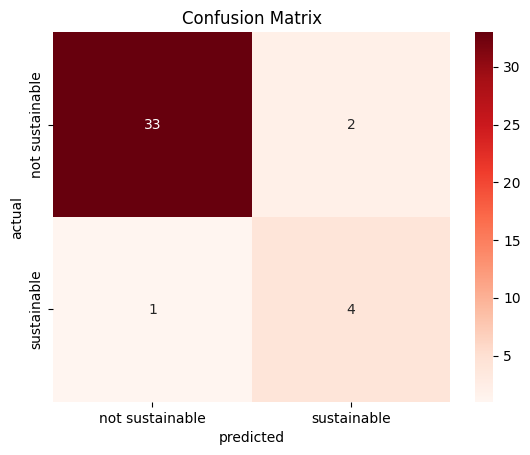

In [15]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds',
            xticklabels=['not sustainable','sustainable'],
            yticklabels=['not sustainable','sustainable'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
print(classification_report(y_test,y_pred,target_names=['not sustainable','sustainable']))

                 precision    recall  f1-score   support

not sustainable       0.97      0.94      0.96        35
    sustainable       0.67      0.80      0.73         5

       accuracy                           0.93        40
      macro avg       0.82      0.87      0.84        40
   weighted avg       0.93      0.93      0.93        40

